In [14]:
import pandas as pd
import numpy as np

import folium

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data  = pd.read_csv('listings.csv')
data.shape

/home/raviranjan0631/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(83850, 106)

In [8]:
data = data.dropna(subset = ['review_scores_value', 'latitude', 'longitude', 'price'])
data.shape

(61058, 106)

In [9]:
# performing operation on only 20k data due to computation power
data = data[:20000]

In [18]:


def kmeans1(data):
    clusters = [i for i in range(11, 55, 2)]
    inertia = []
    for i in clusters:
        kmeans = KMeans(n_clusters=i, init='k-means++')
        kmeans.fit(data)
        print(i, 'th cluster done')
        inertia.append(kmeans.inertia_)
        
    return inertia , clusters


def inertiaPlot(inertia, k):
    plt.plot(k, inertia)
    plt.xlabel("k")
    plt.ylabel("inertia")
    plt.title("elbow knee method")
    plt.show()
    


11 th cluster done
13 th cluster done
15 th cluster done
17 th cluster done
19 th cluster done
21 th cluster done
23 th cluster done
25 th cluster done
27 th cluster done
29 th cluster done
31 th cluster done
33 th cluster done
35 th cluster done
37 th cluster done
39 th cluster done
41 th cluster done
43 th cluster done
45 th cluster done
47 th cluster done
49 th cluster done
51 th cluster done
53 th cluster done


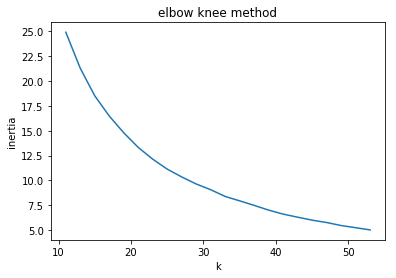

CPU times: user 4min 21s, sys: 13.9 s, total: 4min 35s
Wall time: 2min 20s


In [19]:
%%time
lat_long = data[['latitude', 'longitude']].values
i, k = kmeans1(lat_long)
inertiaPlot(i, k)

### Elbow knee Method to determine right K
choosing k = 3 as the optimal center

In [22]:
model1 = KMeans(n_clusters=33, init='k-means++')
model1.fit(lat_long)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=33, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
data['region'] = model1.labels_

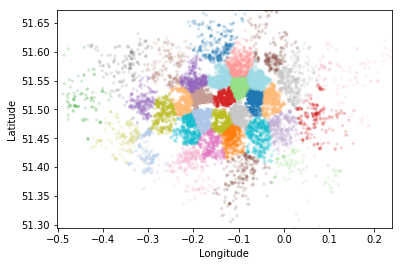

<Figure size 720x360 with 0 Axes>

In [34]:

#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-0.501300, 0.238150)
    city_lat_border = (51.294540, 51.672150)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.longitude.values[:200000], frame.latitude.values[:200000], s=10, lw=0,
               c=frame.region.values[:200000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.figure(figsize = (5,5), facecolor = None)
    plt.show()

plot_clusters(data)

In [31]:
map_osm = folium.Map(location=[51.5074, -0.1278], tiles='Stamen Toner')
map_osm

### Observation: - 
on compairing the clusters with map we get approx same area distribution

In [48]:

def avg_price_per_cluster( model, data):
    pred_labels = model.labels_
    count = 0
    cluster = []
    price_cluster = []
    for label in np.unique(model.labels_):
        avg_price = 0
        count = 0
        for i in range(data.shape[0]):
            if label == data.region.values[i]:
                avg_price += float(data.price.values[i].replace('$', '').replace(',',''))
                count += 1
            
        
        price_cluster.append(avg_price / count)
        cluster.append(label)
    return cluster, price_cluster

In [49]:
cluster, price_cluster =avg_price_per_cluster(model1, data)

In [55]:
price = []
for region in data.region.values:
    for i in range(33):
        if region == cluster[i]:
            price.append(price_cluster[i])


In [87]:
data['avg_price'] = price
data.avg_price.value_counts()

94.091724     1450
106.511145    1301
79.991332     1269
157.453029    1139
128.453982    1130
154.159156    1043
97.483124     1037
114.708978     969
106.396739     920
79.467700      774
118.695990     773
104.573123     759
73.483734      707
73.783626      684
98.230061      652
70.481293      588
62.431034      522
108.913386     508
72.737603      484
93.871636      483
82.979042      334
64.298137      322
58.014760      271
59.323308      266
73.860377      265
65.042194      237
51.177966      236
89.367713      223
99.658537      205
56.369863      146
48.779817      109
53.891089      101
57.677419       93
Name: avg_price, dtype: int64

In [90]:
data_frame = pd.DataFrame({'latitude':data.latitude.values, 'longitude': data.longitude.values, 'avg_price': data.avg_price.values})

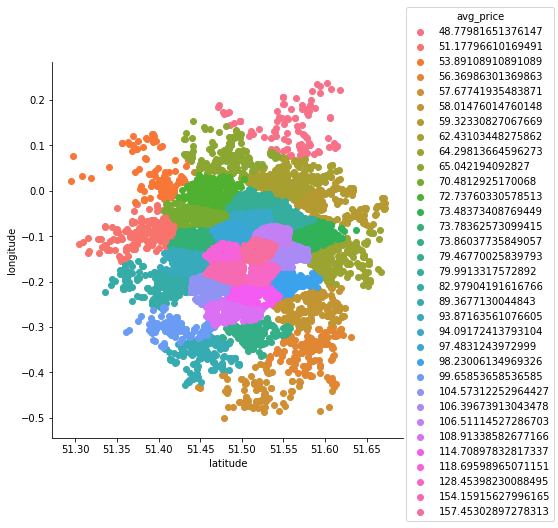

In [93]:
sns.FacetGrid(data_frame, hue='avg_price', size=6).map(plt.scatter,'latitude', 'longitude').add_legend()

In [62]:
print('The minimum price we can get at region ',cluster[price_cluster.index(min(price_cluster))],' with price ', min(price_cluster))

The minimum price we can get at region  21  with price  48.77981651376147 at co-ordinate


In [63]:
print('The maximum price we can get at region ',cluster[price_cluster.index(max(price_cluster))],' with price ', max(price_cluster))

The maximum price we can get at region  11  with price  157.45302897278313 at co-ordinate


In [79]:

def avg_rating_per_cluster( model, data):
    pred_labels = model.labels_
    count = 0
    cluster = []
    rating_cluster = []
    for label in np.unique(model.labels_):
        avg_rating = 0
        count = 0
        for i in range(data.shape[0]):
            if label == data.region.values[i]:
                avg_rating += int(data.review_scores_value.values[i])
                count += 1
            
        
        rating_cluster.append(avg_rating / count)
        cluster.append(label)
    return cluster, rating_cluster

In [80]:
cluster, rating_cluster =avg_rating_per_cluster(model1, data)

In [81]:
rating = []
for region in data.region.values:
    for i in range(33):
        if region == cluster[i]:
            rating.append(rating_cluster[i])


In [96]:
data['avg_rating'] = rating

data['avg_rating'].value_counts()

9.221379    1450
9.335895    1301
9.453901    1269
9.043020    1139
9.161062    1130
9.235858    1043
9.280617    1037
9.342621     969
9.297826     920
9.308786     774
9.279431     773
9.472991     759
9.437058     707
9.504386     684
9.329755     652
9.532313     588
9.390805     522
9.496063     508
9.398760     484
9.496894     483
9.389222     334
9.605590     322
9.376384     271
9.451128     266
9.464151     265
9.341772     237
9.580508     236
9.511211     223
9.590244     205
9.452055     146
9.238532     109
9.386139     101
9.408602      93
Name: avg_rating, dtype: int64

In [98]:
data_frame = pd.DataFrame({'latitude':data.latitude.values, 'longitude': data.longitude.values, 'avg_rating': data['avg_rating'].values})

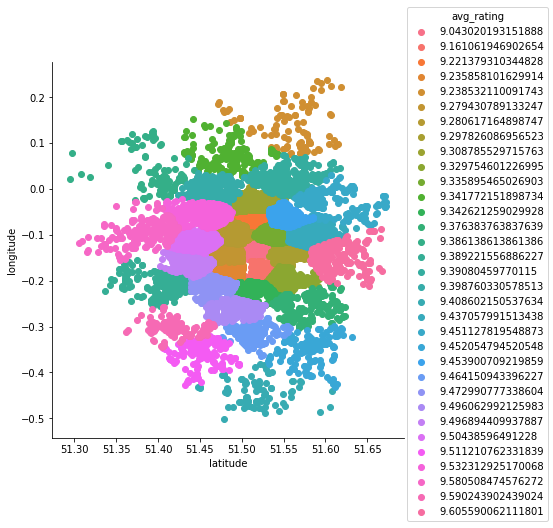

In [99]:
sns.FacetGrid(data_frame, hue='avg_rating', size=6).map(plt.scatter,'latitude', 'longitude').add_legend()

In [83]:
print('The minimum rating we can get at region ',cluster[rating_cluster.index(min(rating_cluster))],' with rating ', min(rating_cluster))

The minimum rating we can get at region  11  with rating  9.043020193151888


In [84]:
print('The minimum rating we can get at region ',cluster[rating_cluster.index(max(rating_cluster))],' with rating ', max(rating_cluster))

The minimum rating we can get at region  0  with rating  9.605590062111801
